In [1]:
from numbers import Number
import pandas as pd

import wmfdata as wmf
from wmfdata.utils import pct_str, sig_figs

You are using Wmfdata v2.0.0, but v2.0.1 is available.

To update, run `pip install --upgrade git+https://github.com/wikimedia/wmfdata-python.git@release`.

To see the changes, refer to https://github.com/wikimedia/wmfdata-python/blob/release/CHANGELOG.md.


In [2]:
metrics = pd.read_csv(
    "metrics/readers_metrics.tsv",
    sep="\t",
    parse_dates=["month"]
).set_index("month")

diversity_metrics = pd.read_csv(
    "metrics/readers_diversity_metrics.tsv",
    sep="\t",
    parse_dates=["month"]
).set_index("month")

# Report

In [4]:
metrics_all = pd.concat([metrics, diversity_metrics], axis=1)
metrics_all  = metrics_all.loc[:,~metrics_all.columns.duplicated()]

In [5]:
report_order = [
    'interactions', 
        'total_pageview',
        'automated_pageviews',
        'desktop', 
        'mobileweb',
        'previews_seen',
    'unique_devices',
    # Diversity
    'gn_interactions',
    'gs_interactions'
]

In [6]:
def fmt_num(x):
    if isinstance(x, Number) and not pd.isnull(x):
        x = sig_figs(x, 3)
        
        if x < 5:
            return pct_str(x)
        else:
            return "{:,.0f}".format(x)
    else:
        return x

def calc_rpt(ser):   
    cur = ser[-1]
    
    try:
        yr_prev = ser[-13]
        yoy_change = (cur / yr_prev) - 1
    except IndexError:
        yoy_change = None
    
    
    res = [cur, yoy_change]
    return pd.Series(
        [fmt_num(n) for n in res],
        index=["value", "yoy_change"]
    )

In [7]:
(
    metrics_all
    .apply(calc_rpt)
    .transpose()
    .reindex(report_order)
    .fillna("—")
)

,value,yoy_change
interactions,"20,500,000,000",8.7%
total_pageview,"19,000,000,000",9.8%
automated_pageviews,"2,980,000,000",24.0%
desktop,"5,670,000,000",-8.2%
mobileweb,"13,000,000,000",20.2%
previews_seen,"1,590,000,000",-2.7%
unique_devices,"1,530,000,000",-0.9%
gn_interactions,"15,100,000,000",6.4%
gs_interactions,"5,430,000,000",15.8%


## Create Charts

Changing directory to:/srv/home/mayakpwiki/High-Level-Metrics/2023-metrics/key_product_metrics/wikicharts
Generating Content Interactions chart...


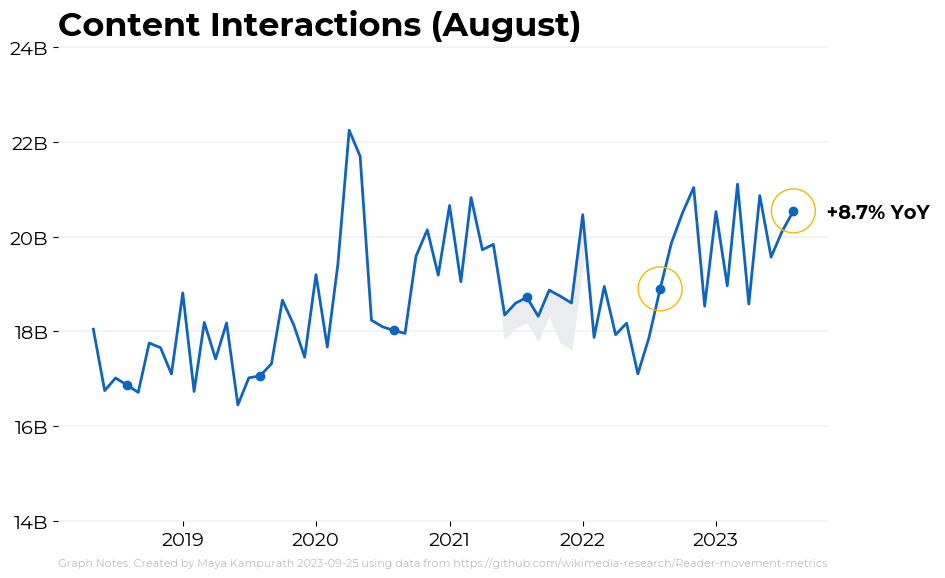

Generating Unique Devices chart...
Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


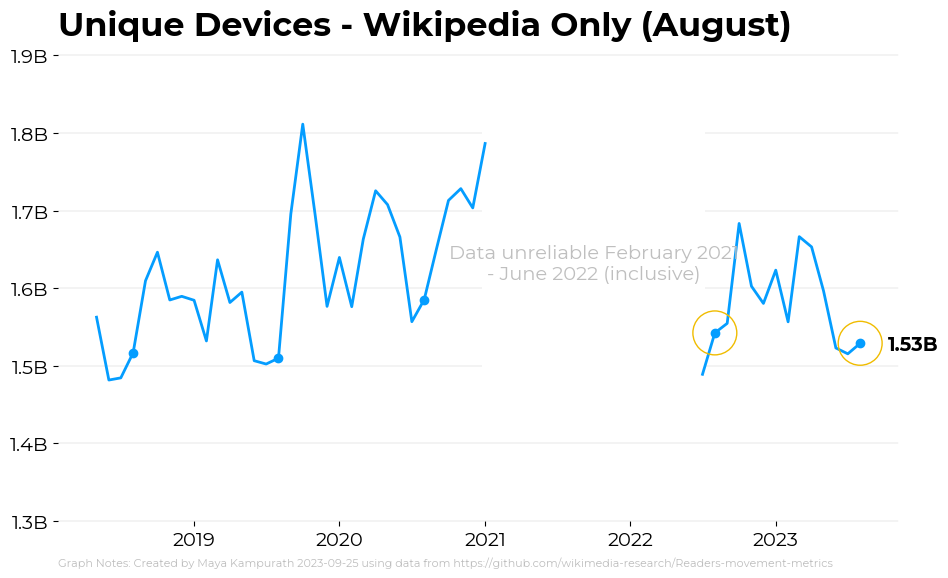

Generating Regional Unique Devices chart...
Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


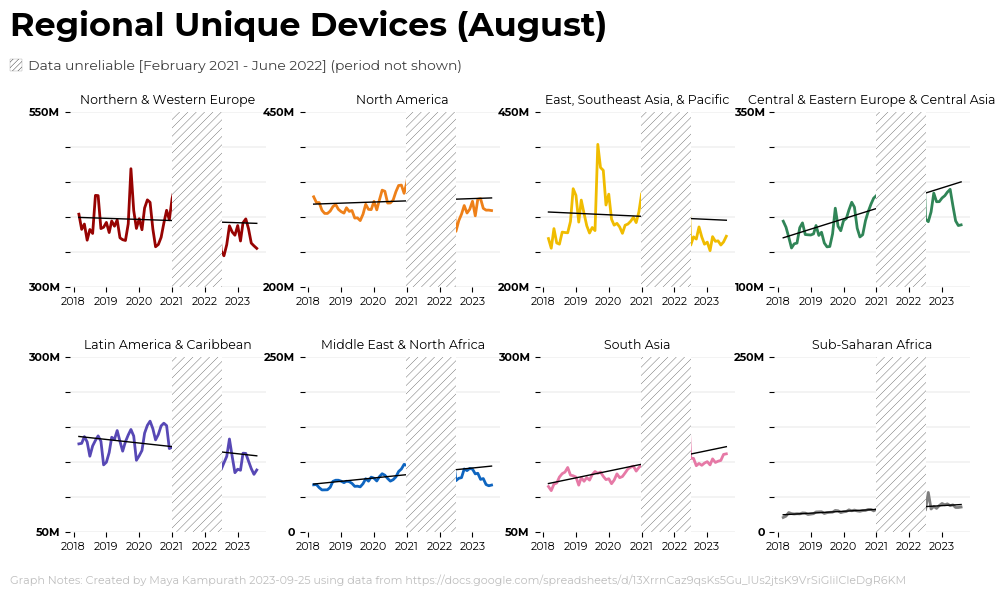

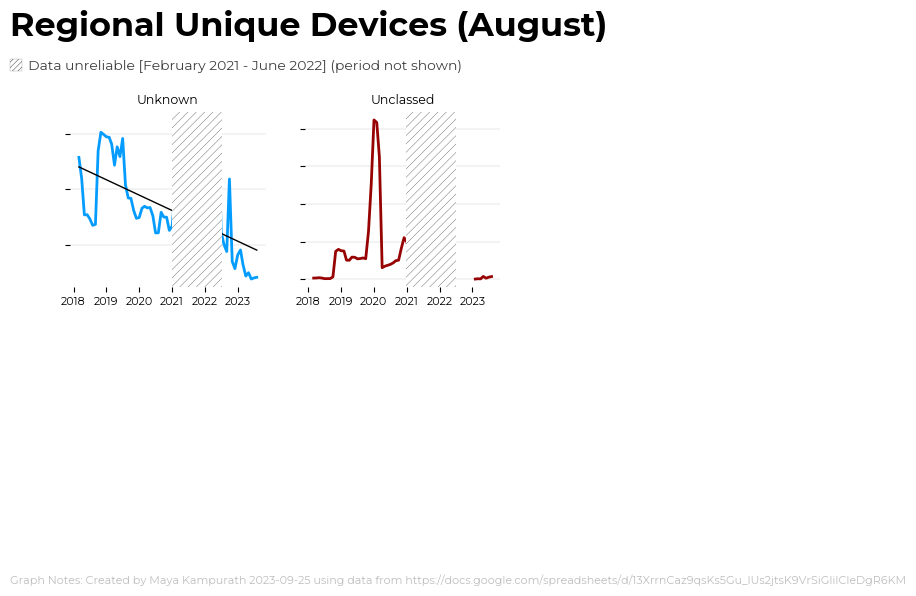

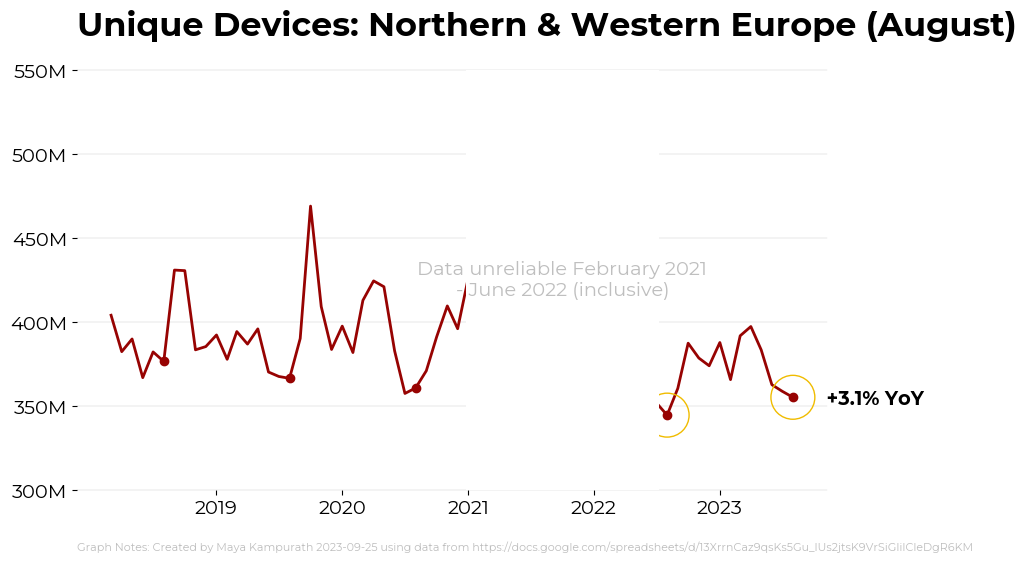

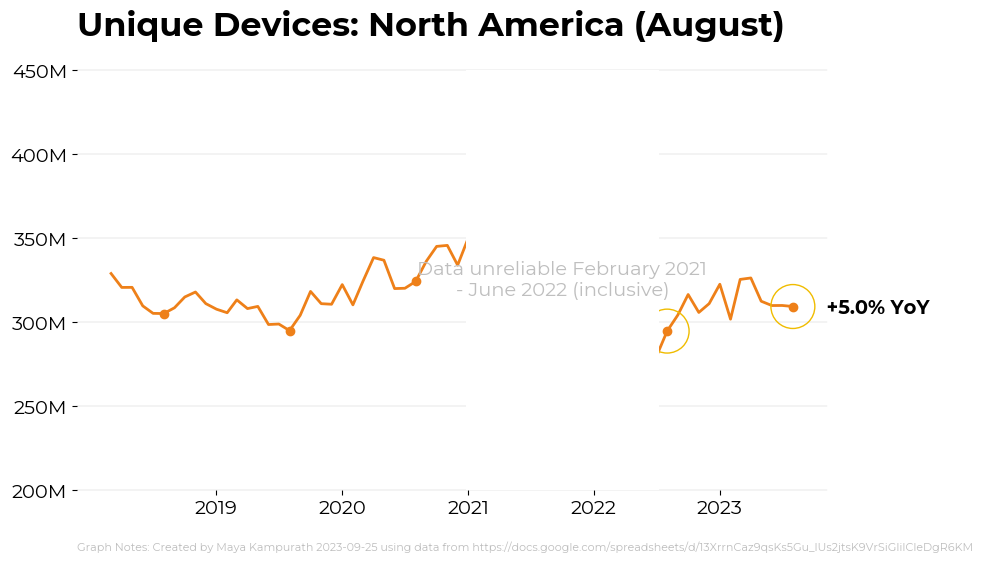

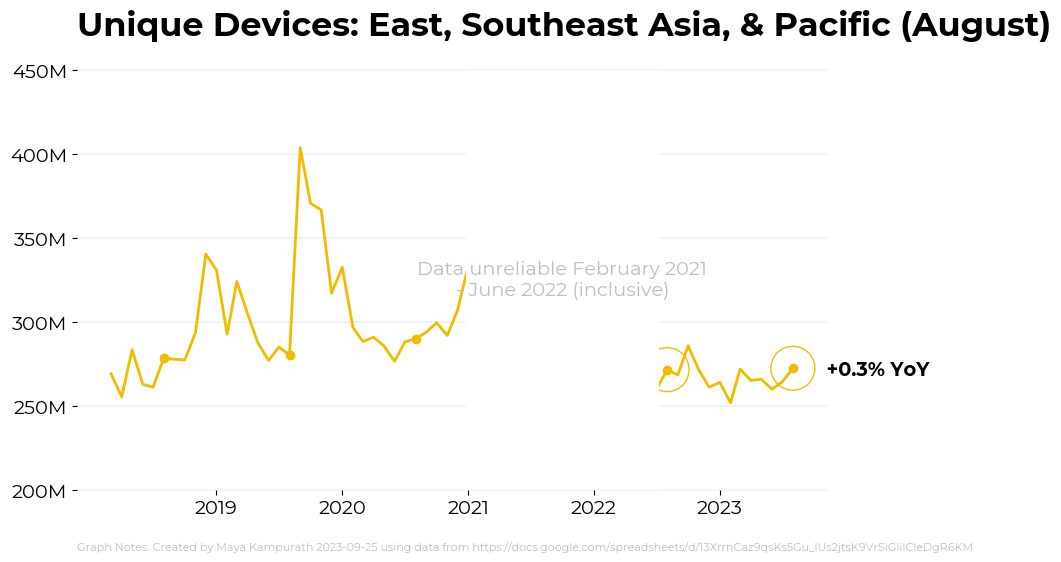

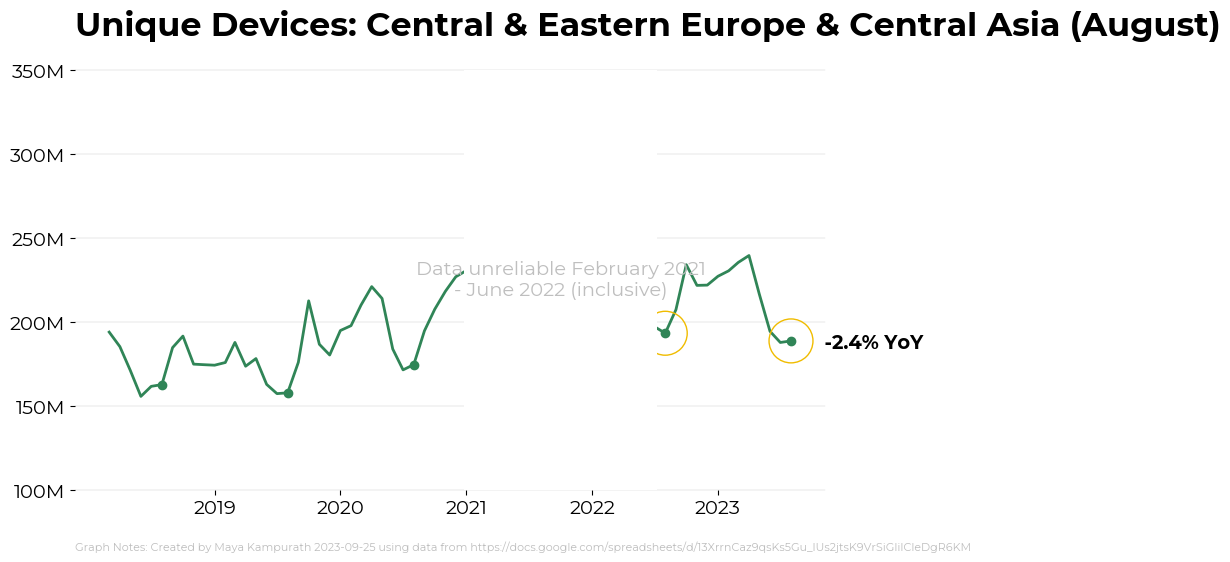

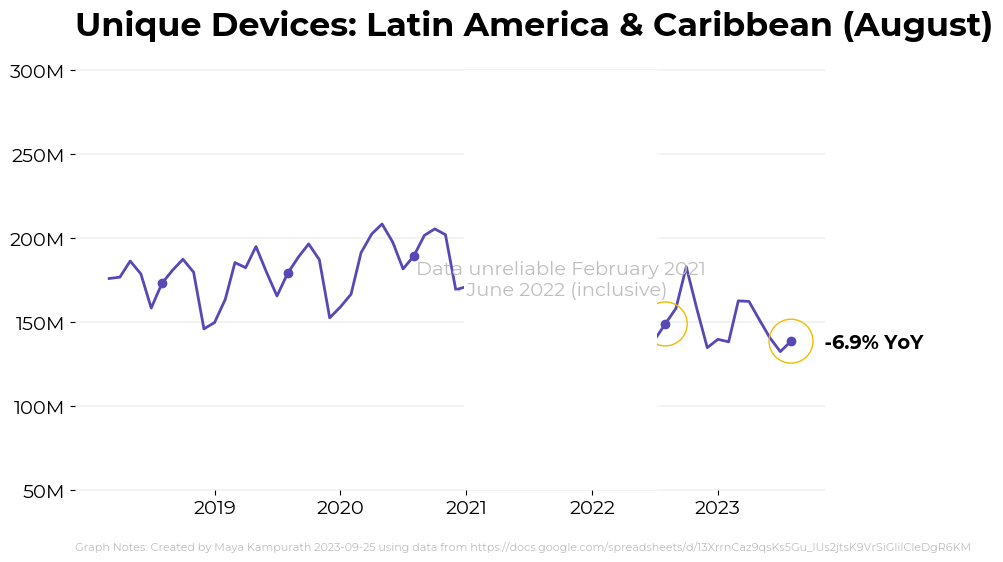

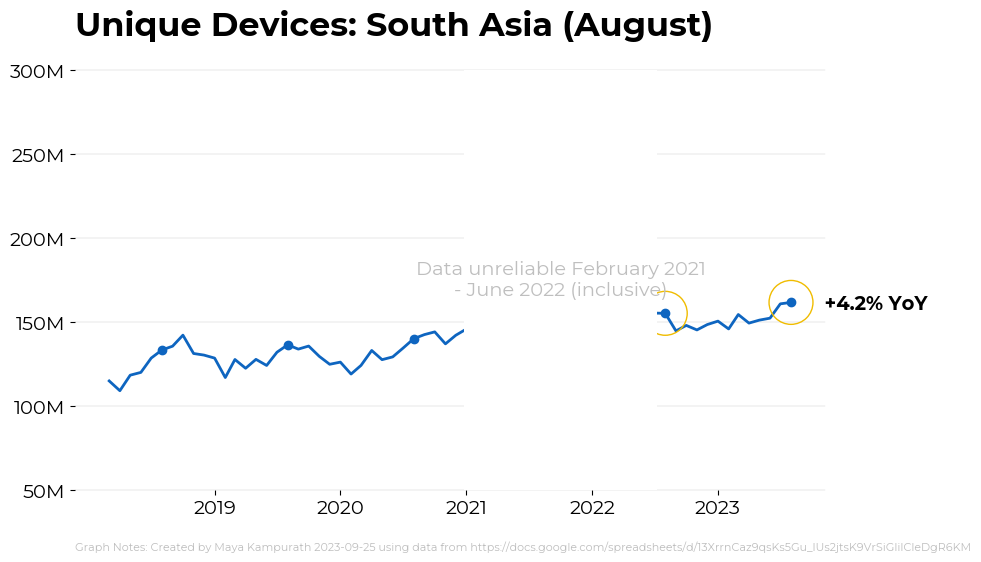

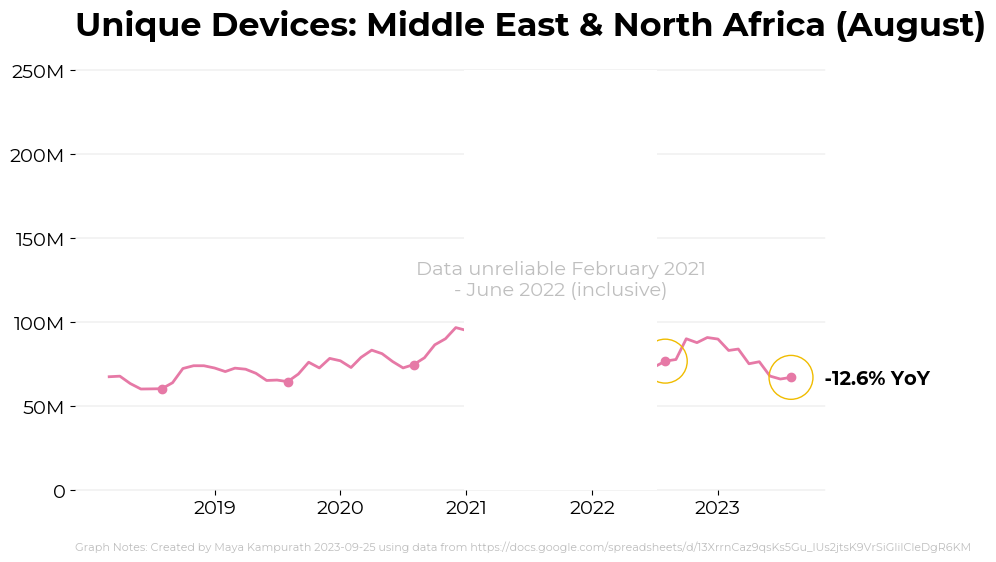

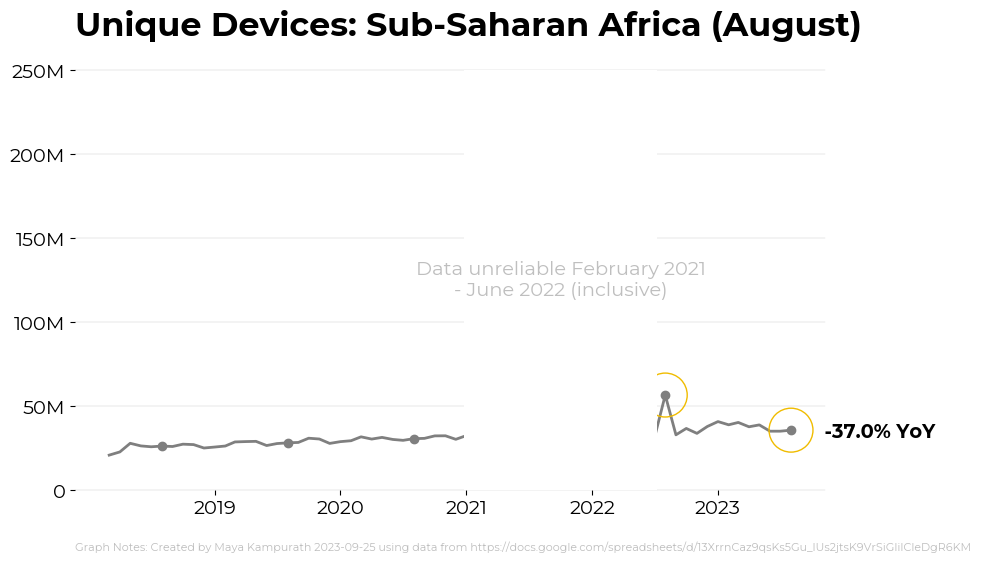

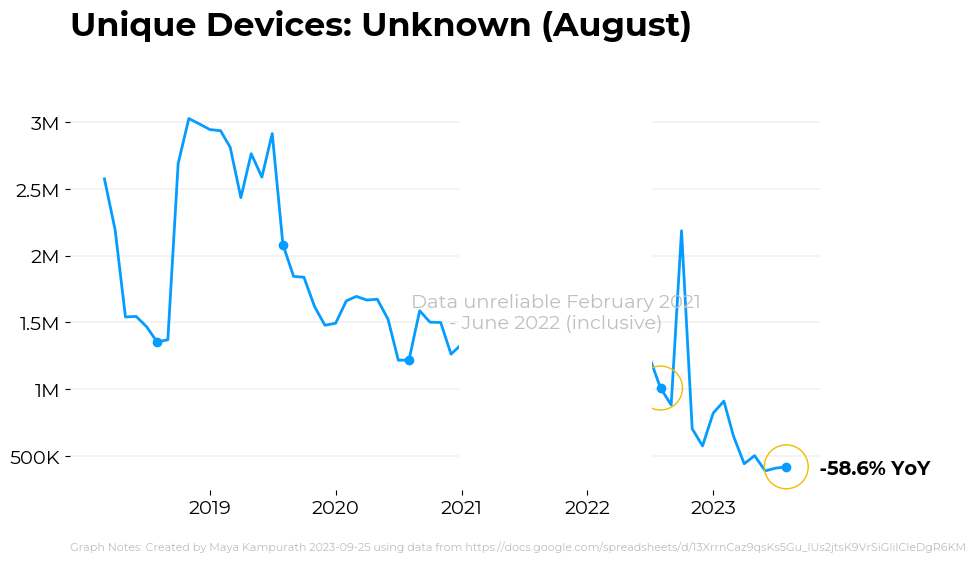

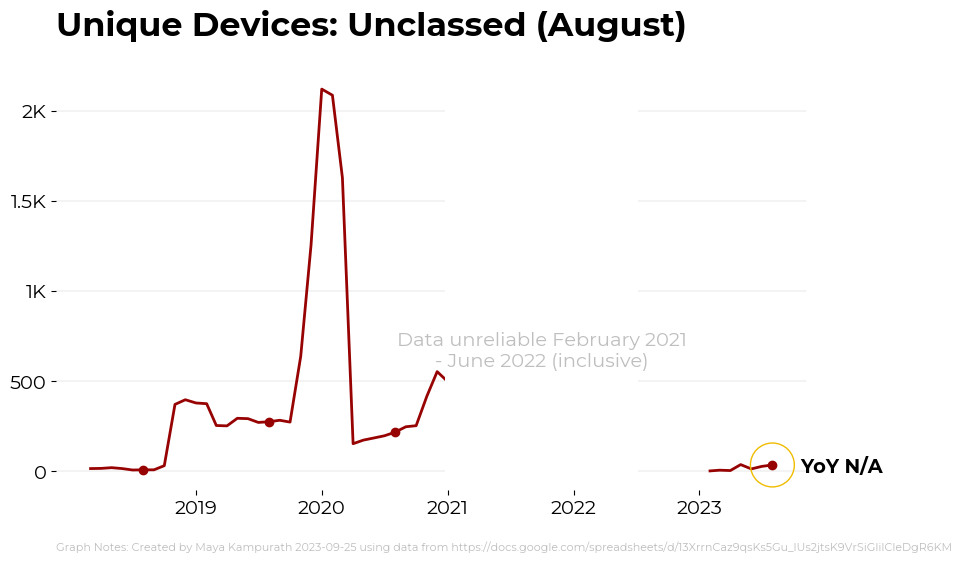

Resetting directory to:/srv/home/mayakpwiki/High-Level-Metrics/2023-metrics/key_product_metrics/wikicharts


In [1]:
%run ../key_product_metrics/wikicharts/READER_METRICS.ipynb